Models for Risk Stratification

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import xgboost as xgb
from sklearn.metrics import accuracy_score


In [2]:
final_cleaned =pd.read_csv('final_df_no_insulin.csv')

In [3]:
final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447254 entries, 0 to 447253
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   GD                  447254 non-null  int64  
 1   diabete_history     447254 non-null  int64  
 2   blood               447254 non-null  int64  
 3   circulatory         447254 non-null  int64  
 4   congenital          447254 non-null  int64  
 5   digestive           447254 non-null  int64  
 6   endocrine           447254 non-null  int64  
 7   genitourinary       447254 non-null  int64  
 8   infectious          447254 non-null  int64  
 9   injury              447254 non-null  int64  
 10  mental              447254 non-null  int64  
 11  misc                447254 non-null  int64  
 12  muscular            447254 non-null  int64  
 13  neoplasms           447254 non-null  int64  
 14  nervous             447254 non-null  int64  
 15  pregnancy           447254 non-nul

In [4]:
final_cleaned.head()



,GD,diabete_history,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,...,Urea Nitrogen,RACE_ASIAN,RACE_BLACK,RACE_HISPANIC,RACE_OTHER/UNKNOWN,RACE_WHITE,AGE_MIDDLE_ADULT,AGE_OLD_ADULT,AGE_SENIOR,AGE_YOUNG_ADULT
0,0,0,1,0,0,4,3,1,0,0,...,6.416667,0,0,0,0,1,1,0,0,0
1,0,0,1,0,0,4,3,1,0,0,...,6.416667,0,0,0,0,1,1,0,0,0
2,0,0,1,0,0,4,3,1,0,0,...,6.416667,0,0,0,0,1,1,0,0,0
3,0,0,1,0,0,4,3,1,0,0,...,6.416667,0,0,0,0,1,1,0,0,0
4,0,0,1,0,0,4,3,1,0,0,...,6.416667,0,0,0,0,1,1,0,0,0


In [24]:
y = final_cleaned['GD']
# Prediction Features, filter out label
features = final_cleaned.drop(columns=['GD'],axis=1)

In [26]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447254 entries, 0 to 447253
Data columns (total 37 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   diabete_history     447254 non-null  int64  
 1   blood               447254 non-null  int64  
 2   circulatory         447254 non-null  int64  
 3   congenital          447254 non-null  int64  
 4   digestive           447254 non-null  int64  
 5   endocrine           447254 non-null  int64  
 6   genitourinary       447254 non-null  int64  
 7   infectious          447254 non-null  int64  
 8   injury              447254 non-null  int64  
 9   mental              447254 non-null  int64  
 10  misc                447254 non-null  int64  
 11  muscular            447254 non-null  int64  
 12  neoplasms           447254 non-null  int64  
 13  nervous             447254 non-null  int64  
 14  pregnancy           447254 non-null  int64  
 15  prenatal            447254 non-nul

In [25]:
feature_names = features.columns.tolist()
print(feature_names)


['diabete_history', 'blood', 'circulatory', 'congenital', 'digestive', 'endocrine', 'genitourinary', 'infectious', 'injury', 'mental', 'misc', 'muscular', 'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin', 'BMI', 'Systolic_BP', 'Diastolic_BP', 'Glucose', 'Hemoglobin A1c', 'HDL', 'LDL', 'Creatinine', 'Triglycerides', 'Urea Nitrogen', 'RACE_ASIAN', 'RACE_BLACK', 'RACE_HISPANIC', 'RACE_OTHER/UNKNOWN', 'RACE_WHITE', 'AGE_MIDDLE_ADULT', 'AGE_OLD_ADULT', 'AGE_SENIOR', 'AGE_YOUNG_ADULT']


<AxesSubplot:>

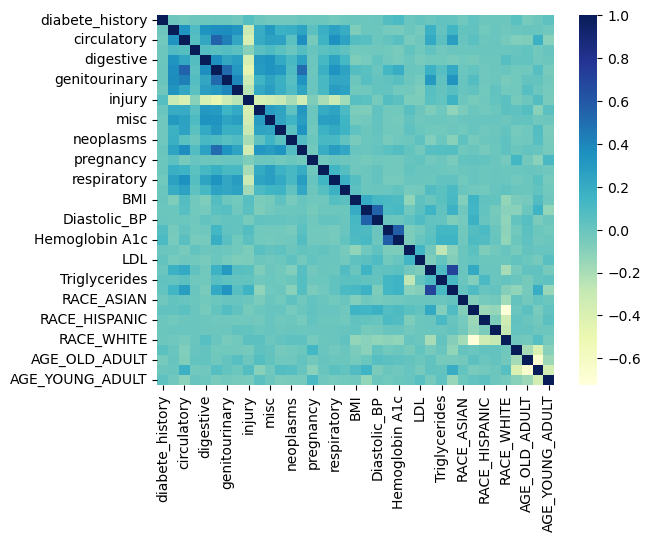

In [27]:
import seaborn as sns

corr_matrix = features.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu")


From the heatmap,  those more correlated are features about diagnoses. I think this may be because of complications.


The first model will be XGBoost, for usually it can choose features automatically, which means drop a lot of work for feature selection.

In [29]:
from sklearn.model_selection import train_test_split

# Split into training set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=42)

# The distribution between train and test data set
print("Train: {}".format(X_train.shape[0]))
print("Test: {}".format(X_test.shape[0]))


Train: 357803
Test: 89451


In [9]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier


In [30]:
X= features


In [35]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier

# 创建XGB模型
xgb_model = XGBClassifier()

# 定义k-fold交叉验证器
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 初始化指标列表
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []

# 循环进行交叉验证并记录指标
for train_idx, val_idx in kf.split(X):
    # 获取训练集和验证集
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # 训练模型
    xgb_model.fit(X_train, y_train)

    # 预测结果
    y_pred = xgb_model.predict(X_val)

    # 计算指标
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    auc = roc_auc_score(y_val, xgb_model.predict_proba(X_val)[:, 1])

    # 记录指标
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    auc_scores.append(auc)

# 打印指标平均值
print("Accuracy:", sum(accuracy_scores)/len(accuracy_scores))
print("Precision:", sum(precision_scores)/len(precision_scores))
print("Recall:", sum(recall_scores)/len(recall_scores))
print("F1 score:", sum(f1_scores)/len(f1_scores))
print("AUC:", sum(auc_scores)/len(auc_scores))


Accuracy: 0.9984214784028922
Precision: 0.9984216341111848
Recall: 0.9984214784028922
F1 score: 0.9984179110089686
AUC: 0.9999338334894707


Let's try risk stratification

In [40]:
print(y_pred_classes)

['low', 'low', 'low', 'low', 'low', ..., 'low', 'low', 'low', 'low', 'low']
Length: 89451
Categories (3, object): ['low' < 'medium' < 'high']


In [41]:
y_pred_classes.value_counts()

low       78781
medium      389
high      10281
dtype: int64

Find the most important features

In [48]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize


In [53]:
importances = xgb_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_names = [feature_names[i] for i in indices]

# Print the feature ranking
print("Feature ranking:")
for i in range(X_train.shape[1]):
    print(f"{i+1}. {sorted_names[i]} ({importances[indices[i]]:.4f})")


Feature ranking:
1. diabete_history (0.3354)
2. pregnancy (0.0566)
3. circulatory (0.0555)
4. AGE_SENIOR (0.0450)
5. HDL (0.0326)
6. AGE_OLD_ADULT (0.0324)
7. Glucose (0.0292)
8. Hemoglobin A1c (0.0279)
9. RACE_BLACK (0.0273)
10. Urea Nitrogen (0.0259)
11. Systolic_BP (0.0247)
12. AGE_MIDDLE_ADULT (0.0243)
13. AGE_YOUNG_ADULT (0.0243)
14. Diastolic_BP (0.0237)
15. LDL (0.0233)
16. Triglycerides (0.0231)
17. Creatinine (0.0210)
18. BMI (0.0194)
19. respiratory (0.0157)
20. skin (0.0141)
21. RACE_ASIAN (0.0118)
22. RACE_HISPANIC (0.0118)
23. injury (0.0117)
24. RACE_WHITE (0.0107)
25. blood (0.0097)
26. neoplasms (0.0090)
27. RACE_OTHER/UNKNOWN (0.0068)
28. mental (0.0064)
29. endocrine (0.0062)
30. prenatal (0.0054)
31. nervous (0.0053)
32. infectious (0.0052)
33. muscular (0.0052)
34. digestive (0.0044)
35. congenital (0.0042)
36. misc (0.0026)
37. genitourinary (0.0020)


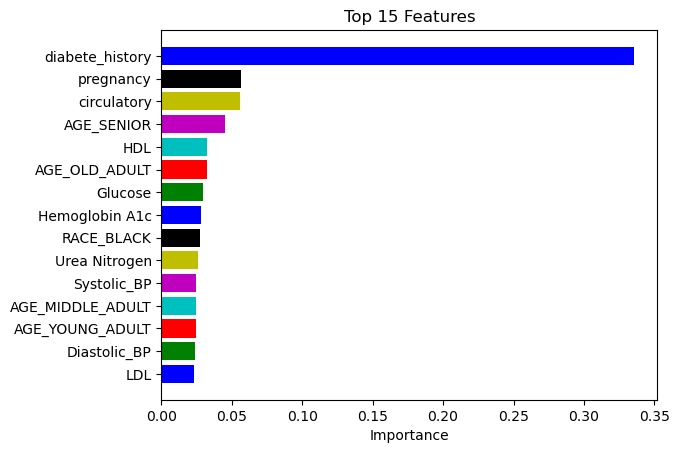

In [54]:
import matplotlib.pyplot as plt

# Select top 15 features
n_features = 15
top_features = sorted_names[:n_features][::-1]

# Create a dictionary of feature indices and importances
feature_dict = dict(zip(feature_names, importances))

# Create a list of importances for the top features
top_importances = [feature_dict[f] for f in top_features]

# Create a bar chart of the top features and their importances
plt.barh(range(len(top_features)), top_importances,
         color=['b', 'g', 'r', 'c', 'm', 'y', 'k'])
plt.yticks(range(len(top_features)), top_features)
plt.xlabel("Importance")
plt.title("Top 15 Features")
plt.show()


We know that if the patient has been diagnosed as diabetes before, there is high possibility that she will have gestational diabetes when pregnancy. Let's see what if we don't use this feature.

In [55]:
y = final_cleaned['GD']
# Prediction Features, filter out label
features = final_cleaned.drop(columns=['GD','diabete_history'],axis=1)
feature_names = features.columns.tolist()
print(feature_names)


['blood', 'circulatory', 'congenital', 'digestive', 'endocrine', 'genitourinary', 'infectious', 'injury', 'mental', 'misc', 'muscular', 'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin', 'BMI', 'Systolic_BP', 'Diastolic_BP', 'Glucose', 'Hemoglobin A1c', 'HDL', 'LDL', 'Creatinine', 'Triglycerides', 'Urea Nitrogen', 'RACE_ASIAN', 'RACE_BLACK', 'RACE_HISPANIC', 'RACE_OTHER/UNKNOWN', 'RACE_WHITE', 'AGE_MIDDLE_ADULT', 'AGE_OLD_ADULT', 'AGE_SENIOR', 'AGE_YOUNG_ADULT']


In [56]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier

X= features
# 创建XGB模型
xgb_model = XGBClassifier()

# 定义k-fold交叉验证器
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 初始化指标列表
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []

# 循环进行交叉验证并记录指标
for train_idx, val_idx in kf.split(X):
    # 获取训练集和验证集
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # 训练模型
    xgb_model.fit(X_train, y_train)

    # 预测结果
    y_pred = xgb_model.predict(X_val)

    # 计算指标
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    auc = roc_auc_score(y_val, xgb_model.predict_proba(X_val)[:, 1])

    # 记录指标
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    auc_scores.append(auc)

# 打印指标平均值
print("Accuracy:", sum(accuracy_scores)/len(accuracy_scores))
print("Precision:", sum(precision_scores)/len(precision_scores))
print("Recall:", sum(recall_scores)/len(recall_scores))
print("F1 score:", sum(f1_scores)/len(f1_scores))
print("AUC:", sum(auc_scores)/len(auc_scores))


Accuracy: 0.9985556292614811
Precision: 0.9985568265555136
Recall: 0.9985556292614811
F1 score: 0.9985520859114079
AUC: 0.999929693540774


In [57]:
importances = xgb_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_names = [feature_names[i] for i in indices]

# Print the feature ranking
print("Feature ranking:")
for i in range(X_train.shape[1]):
    print(f"{i+1}. {sorted_names[i]} ({importances[indices[i]]:.4f})")

Feature ranking:
1. circulatory (0.0909)
2. pregnancy (0.0724)
3. AGE_MIDDLE_ADULT (0.0547)
4. Hemoglobin A1c (0.0500)
5. AGE_YOUNG_ADULT (0.0478)
6. LDL (0.0475)
7. Urea Nitrogen (0.0471)
8. RACE_BLACK (0.0463)
9. AGE_SENIOR (0.0416)
10. Glucose (0.0387)
11. Triglycerides (0.0379)
12. HDL (0.0372)
13. Systolic_BP (0.0372)
14. RACE_WHITE (0.0362)
15. Diastolic_BP (0.0322)
16. BMI (0.0309)
17. Creatinine (0.0290)
18. AGE_OLD_ADULT (0.0229)
19. RACE_HISPANIC (0.0222)
20. injury (0.0218)
21. neoplasms (0.0199)
22. genitourinary (0.0191)
23. skin (0.0184)
24. mental (0.0159)
25. RACE_ASIAN (0.0141)
26. muscular (0.0093)
27. respiratory (0.0093)
28. RACE_OTHER/UNKNOWN (0.0082)
29. congenital (0.0077)
30. nervous (0.0072)
31. infectious (0.0070)
32. blood (0.0065)
33. endocrine (0.0055)
34. digestive (0.0043)
35. prenatal (0.0024)
36. misc (0.0007)


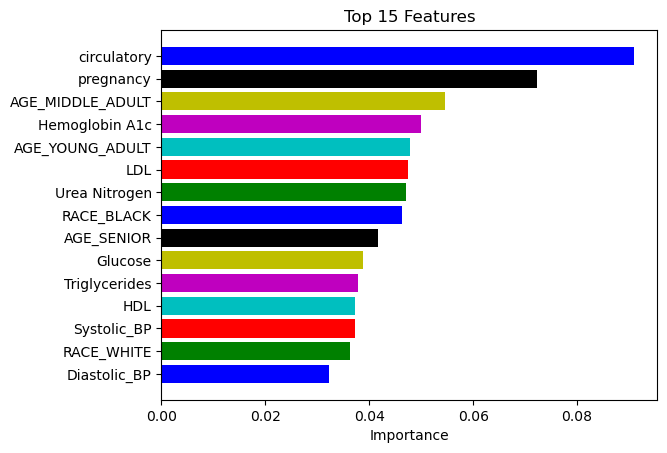

In [58]:
import matplotlib.pyplot as plt

# Select top 15 features
n_features = 15
top_features = sorted_names[:n_features][::-1]

# Create a dictionary of feature indices and importances
feature_dict = dict(zip(feature_names, importances))

# Create a list of importances for the top features
top_importances = [feature_dict[f] for f in top_features]

# Create a bar chart of the top features and their importances
plt.barh(range(len(top_features)), top_importances,
         color=['b', 'g', 'r', 'c', 'm', 'y', 'k'])
plt.yticks(range(len(top_features)), top_features)
plt.xlabel("Importance")
plt.title("Top 15 Features")
plt.show()


I also want to try permutation-based XGBoost method to filter the features.

In [72]:
X_test.columns

Index(['blood', 'circulatory', 'congenital', 'digestive', 'endocrine',
       'genitourinary', 'infectious', 'injury', 'mental', 'misc', 'muscular',
       'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin',
       'BMI', 'Systolic_BP', 'Diastolic_BP', 'Glucose', 'Hemoglobin A1c',
       'HDL', 'LDL', 'Creatinine', 'Triglycerides', 'Urea Nitrogen',
       'RACE_ASIAN', 'RACE_BLACK', 'RACE_HISPANIC', 'RACE_OTHER/UNKNOWN',
       'RACE_WHITE', 'AGE_MIDDLE_ADULT', 'AGE_OLD_ADULT', 'AGE_SENIOR',
       'AGE_YOUNG_ADULT'],
      dtype='object')

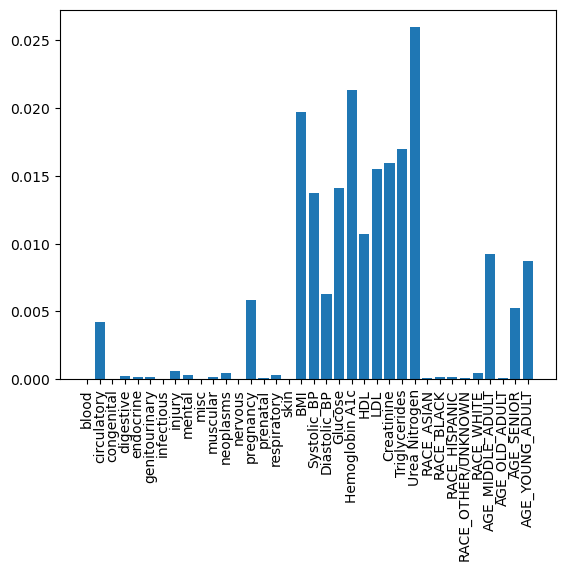

In [75]:

import matplotlib.pyplot as plt


def evaluate(model, X, y):
    y_pred = model.predict(X)
    return accuracy_score(y, y_pred)


# 运行permutation-based feature selection
base_score = evaluate(xgb_model, X_test, y_test)
importances = np.zeros(X_test.shape[1])
for i in range(X_test.shape[1]):
    X_test_permuted = X_test.copy().values  # 将DataFrame转换为numpy数组
    np.random.shuffle(X_test_permuted[:, i])
    permuted_score = evaluate(xgb_model, X_test_permuted, y_test)
    importances[i] = base_score - permuted_score
    
# 绘制特征重要性图
plt.bar(range(X_test.shape[1]), importances)
plt.xticks(range(X_test.shape[1]), X_test.columns.values, rotation=90)
plt.show()


In [78]:
threshold = 0.004
important_features = X_test.columns[importances > threshold]
print(important_features)

# 输出选择的特征的列索引


Index(['circulatory', 'pregnancy', 'BMI', 'Systolic_BP', 'Diastolic_BP',
       'Glucose', 'Hemoglobin A1c', 'HDL', 'LDL', 'Creatinine',
       'Triglycerides', 'Urea Nitrogen', 'AGE_MIDDLE_ADULT', 'AGE_SENIOR',
       'AGE_YOUNG_ADULT'],
      dtype='object')


Compared permutation-based XGBoost method with the importances I get from kFold，13 of them are the same, the differences are there are two race-related features from kFold, while 'BMI' and 'Creatinine' from permutation-based XGBoost method. When we go to practical cases, we need to consider whether we will use race-related features or not.

In my project, I tend to use the result from permutation-based XGBoost method .

In [97]:
features_sel=features.loc[:, important_features]
features_sel.info()
X = features_sel


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447254 entries, 0 to 447253
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   circulatory       447254 non-null  int64  
 1   pregnancy         447254 non-null  int64  
 2   BMI               447254 non-null  float64
 3   Systolic_BP       447254 non-null  float64
 4   Diastolic_BP      447254 non-null  float64
 5   Glucose           447254 non-null  float64
 6   Hemoglobin A1c    447254 non-null  float64
 7   HDL               447254 non-null  float64
 8   LDL               447254 non-null  float64
 9   Creatinine        447254 non-null  float64
 10  Triglycerides     447254 non-null  float64
 11  Urea Nitrogen     447254 non-null  float64
 12  AGE_MIDDLE_ADULT  447254 non-null  int64  
 13  AGE_SENIOR        447254 non-null  int64  
 14  AGE_YOUNG_ADULT   447254 non-null  int64  
dtypes: float64(10), int64(5)
memory usage: 51.2 MB


 I will try the logic regression model. For feature selection, the stepwise logistic regression model was conducted using these significant variables identified by forward stepwise analysis with each variable iteratively added to minimize the Akaike Information Criterion (AIC). Finally, the best model was selected and compared with the machine learning model.

In [81]:
from sklearn.model_selection import train_test_split

# Split into training set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(
    features_sel, y, test_size=0.2, random_state=42)

# The distribution between train and test data set
print("Train: {}".format(X_train.shape[0]))
print("Test: {}".format(X_test.shape[0]))


Train: 357803
Test: 89451


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.01,0.1, 1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Create a logistic regression model
lr = LogisticRegression()

# Create a grid search object
grid_search = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.8894279817125141


In [85]:
lr_clf = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print(f"AUC of Logistic Regression: {auc:.4f}")
y_pred_lr = lr_clf.predict(X_test)
print(
    f"Accuracy of Logistic Regression on test set: {accuracy_score(y_test, y_pred_lr):.4f}")


AUC of Logistic Regression: 0.7138
Accuracy of Logistic Regression on test set: 0.8896


In [86]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import PolynomialFeatures


# Generate polynomial features to create interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Fit logistic regression models with Lasso, Ridge, and Elastic Net regularization
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lasso.fit(X_train_scaled, y_train)
ridge = LogisticRegression(penalty='l2', solver='liblinear', C=0.1)
ridge.fit(X_train_scaled, y_train)
elastic_net = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=0.1)
elastic_net.fit(X_train_scaled, y_train)

# Calculate ROC AUC scores for the three models on the testing set
y_pred_lasso = lasso.predict_proba(X_test_scaled)[:, 1]
y_pred_ridge = ridge.predict_proba(X_test_scaled)[:, 1]
y_pred_elastic_net = elastic_net.predict_proba(X_test_scaled)[:, 1]

roc_auc_lasso = roc_auc_score(y_test, y_pred_lasso)
roc_auc_ridge = roc_auc_score(y_test, y_pred_ridge)
roc_auc_elastic_net = roc_auc_score(y_test, y_pred_elastic_net)

print("ROC AUC for Lasso: {:.3f}".format(roc_auc_lasso))
print("ROC AUC for Ridge: {:.3f}".format(roc_auc_ridge))
print("ROC AUC for Elastic Net: {:.3f}".format(roc_auc_elastic_net))


/Users/jieche/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


ROC AUC for Lasso: 0.790
ROC AUC for Ridge: 0.789
ROC AUC for Elastic Net: 0.786


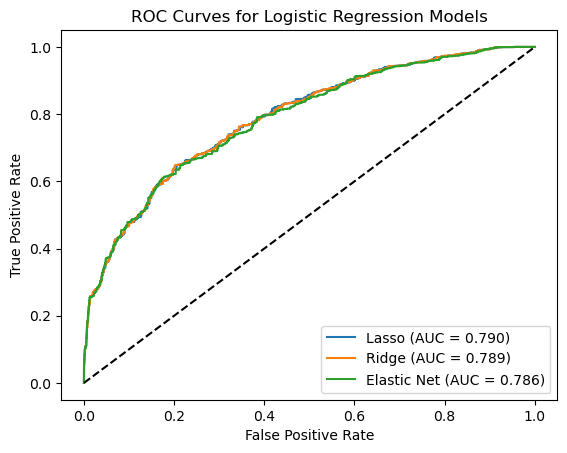

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate the false positive rate and true positive rate for the three models
fpr_lasso, tpr_lasso, _ = roc_curve(y_test, y_pred_lasso)
fpr_ridge, tpr_ridge, _ = roc_curve(y_test, y_pred_ridge)
fpr_elastic_net, tpr_elastic_net, _ = roc_curve(y_test, y_pred_elastic_net)

# Plot the ROC curves for the three models
plt.plot(fpr_lasso, tpr_lasso,
         label='Lasso (AUC = {:.3f})'.format(roc_auc_lasso))
plt.plot(fpr_ridge, tpr_ridge,
         label='Ridge (AUC = {:.3f})'.format(roc_auc_ridge))
plt.plot(fpr_elastic_net, tpr_elastic_net,
         label='Elastic Net (AUC = {:.3f})'.format(roc_auc_elastic_net))
# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression Models')
plt.legend()
plt.show()


In [103]:
print(lasso.coef_) # 系数
print(lasso.intercept_) # 截距

[[ 0.          1.12602769 -0.05266898 -0.75042331 -0.56671476  2.50170631
  -0.02465389 -1.566462   -1.78598597  0.51861154 -1.10727934  0.06971619
  -1.12002759 -0.1652782  -0.74498182  0.4534046  -0.08673524 -0.72460795
   0.69581833 -1.22511567  0.14657817  0.         -0.32927991 -0.18883624
   0.16385471 -0.12330283 -0.28965466  0.11596797 -0.0362383  -0.09323076
   0.18419253 -0.07023517  0.51203743  0.2096621   0.01370502  0.24619926
  -0.65703309 -0.10339568  0.00732134  0.30236637  0.08551647 -0.1003685
   0.09955245 -0.33148098  0.92179091  0.32721015 -0.84997601  0.50962111
   0.06573653  0.          0.89956623 -0.02442339 -0.46028468  0.10053078
  -0.10914113 -1.11509057 -0.71314859  2.18142251 -0.55591955  1.60711634
   0.19876809 -2.07288023 -0.13440546  0.14803894  0.93568727  0.66717327
   0.68532032 -1.96383909  0.48659942 -2.94459085  0.86730648  0.54760905
  -0.24133812 -0.64864396 -0.85703183 -1.37137768  0.49467127 -0.86167707
   0.31633504 -0.93935725 -0.43590036  

Compared with XGB model

In [91]:
#train the model
xgb_model.fit(X_train, y_train)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
# Categorize the predictions into risk levels and convert to integer labels
y_pred = np.where(y_pred_proba <= 0.25, 0,
                  np.where((y_pred_proba > 0.25) & (y_pred_proba < 0.75), 1, 2))

# Calculate the accuracy of the model
auc = roc_auc_score(y_test, y_pred)
print(f"AUC of XGBoost: {auc:.4f}")





AUC of XGBoost: 0.9982


In [92]:


conf_mat = confusion_matrix(y_test, y_pred, labels=[0,1,2])

# Calculate classification report
report = classification_report(y_test, y_pred, labels=[0,1,2])

print("Confusion Matrix:")
print(conf_mat)

print("\nClassification Report:")
print(report)

Confusion Matrix:
[[78766    43     3]
 [   38   422 10179]
 [    0     0     0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78812
           1       0.91      0.04      0.08     10639
           2       0.00      0.00      0.00         0

    accuracy                           0.89     89451
   macro avg       0.64      0.35      0.36     89451
weighted avg       0.99      0.89      0.89     89451



/Users/jieche/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jieche/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jieche/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Compared with Logic Regression Model, the performance of XGBoost is better. Now I have the trained XGBoost model. When we propressed data as a same way, we can use this model to predict the risk stratification of Gestational Diabetes.

Now I will conduct risk stratification:
<20% =low risk
20%-80% = middle risk
>80% =high risk

In [200]:
# 预测概率
probs = xgb_model.predict_proba(X_test)


In [201]:
risk_categories = np.zeros(probs.shape[0], dtype='object')

low_risk_indices = np.where(probs[:, 1] <= 0.2)[0]
middle_risk_indices = np.where((probs[:, 1] > 0.2) & (probs[:, 1] < 0.8))[0]
high_risk_indices = np.where(probs[:, 1] >= 0.8)[0]

risk_categories[low_risk_indices] = 'Low Risk'
risk_categories[middle_risk_indices] = 'Middle Risk'
risk_categories[high_risk_indices] = 'High Risk'


In [202]:
X_test_with_risk = X_test.copy()
X_test_with_risk['Risk Category'] = risk_categories


In [203]:
X_test_with_risk['Risk Category'].value_counts()



Low Risk       78772
High Risk      10007
Middle Risk      672
Name: Risk Category, dtype: int64

The next step is to calculate the contributions of each feature. According to the results from permutation-based feature selection, the selected features are:
['circulatory', 'pregnancy', 'BMI', 'Systolic_BP', 'Diastolic_BP',
       'Glucose', 'Hemoglobin A1c', 'HDL', 'LDL', 'Creatinine',
       'Triglycerides', 'Urea Nitrogen', 'AGE_MIDDLE_ADULT', 'AGE_SENIOR',
       'AGE_YOUNG_ADULT']. I'll try "shap" to finish this task.

In [119]:
import shap

In [206]:
model= xgb_model
explainer = shap.Explainer(model)
shap_values = explainer(X_test)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


SHAP Summary Plot for Low Risk:


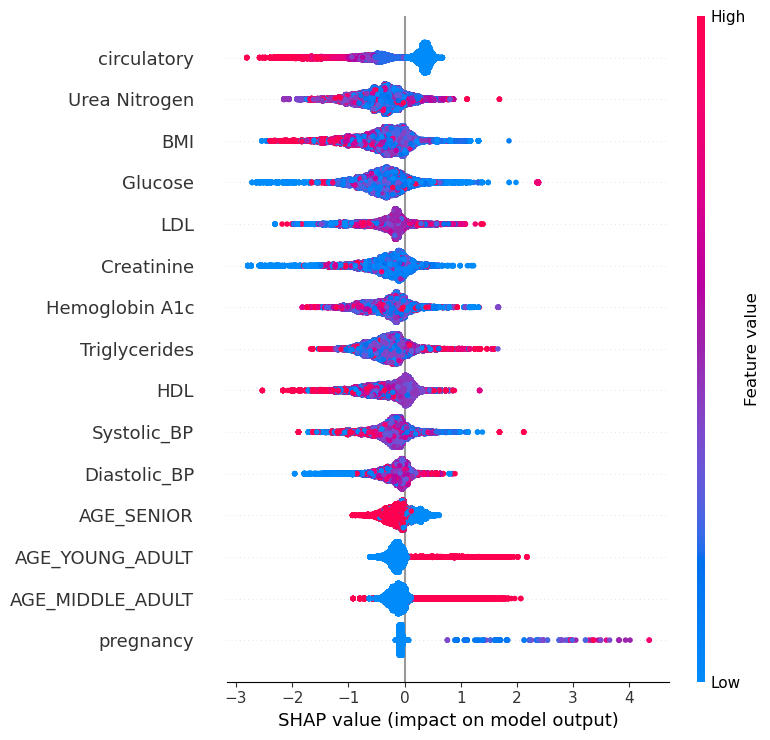

SHAP Summary Plot for Middle Risk:


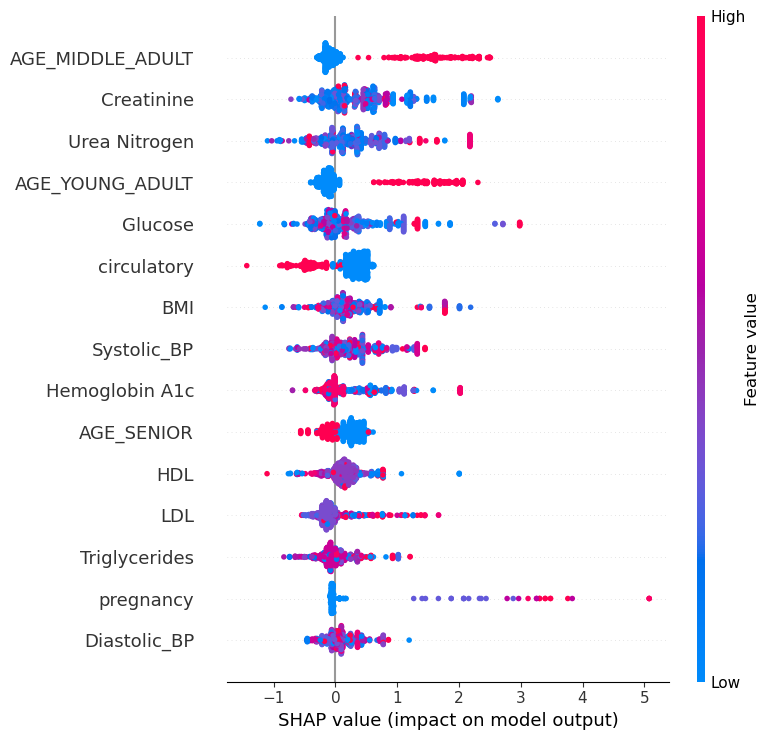

SHAP Summary Plot for High Risk:


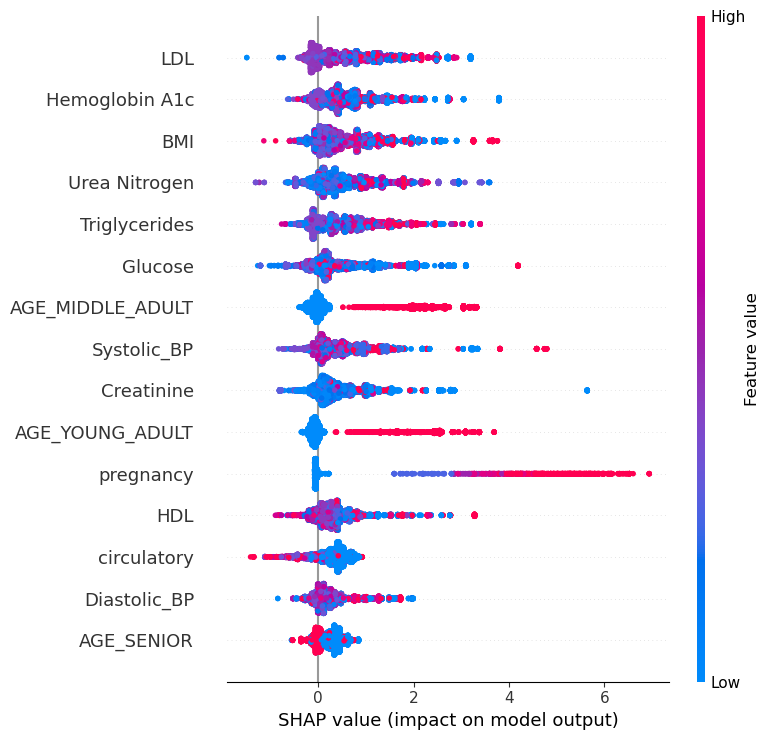

In [207]:
risk_levels = ['Low Risk', 'Middle Risk', 'High Risk']

for risk_level in risk_levels:
    risk_level_indices = np.where(risk_categories == risk_level)[0]
    risk_level_shap_values = shap_values.values[risk_level_indices]
    risk_level_X_test = X_test.iloc[risk_level_indices]

    print(f"SHAP Summary Plot for {risk_level}:")
    shap.summary_plot(risk_level_shap_values, risk_level_X_test)


We can see that the contribution importance for low risk are: circulatory, Urea Nitrogen and BMI; while middle risk are: age_middle_adult, creatinine, and Urea Nitrogen; high risk are: LDL, Hemoglobin A1c, and BMI.

The contribution of each feature in total:

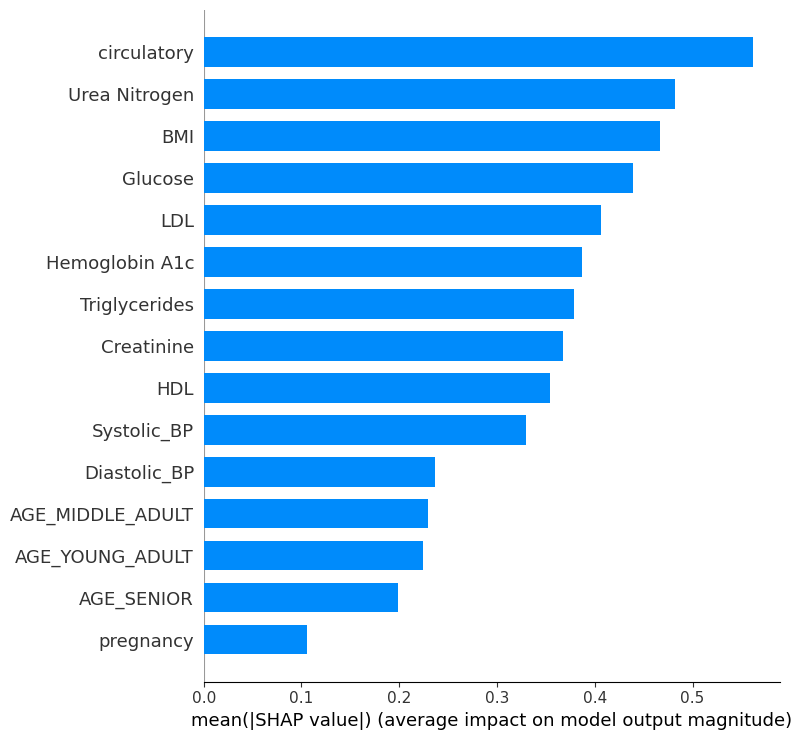

In [208]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


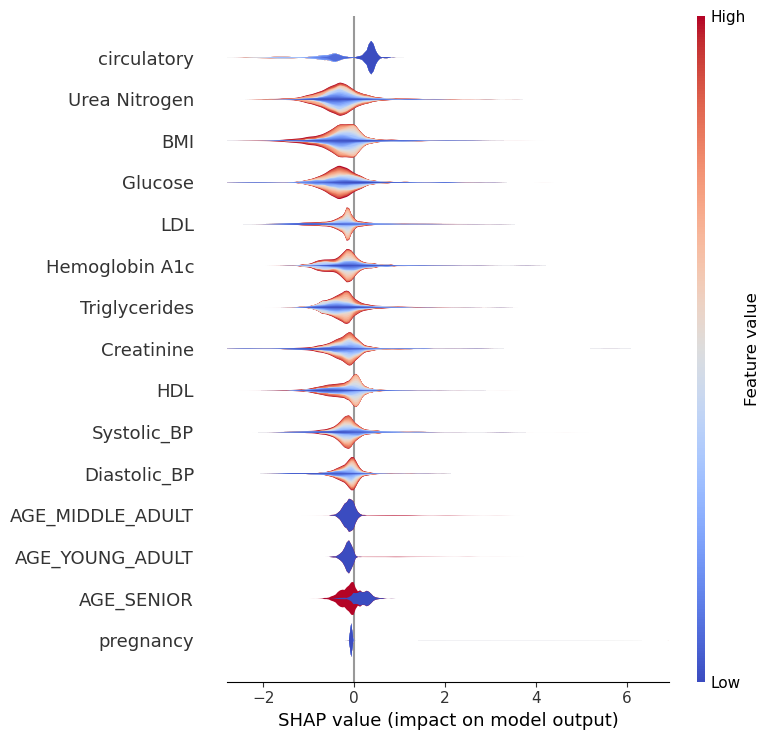

In [141]:
shap.summary_plot(shap_values, X_test, plot_type="layered_violin")


In this model, I draw the heatmap to detect the correlations first, and use permutation-based XGBoost method to filter the feature. After the selection of the feature, I try the logistic regression model and xgb model. Comparing result seems the performance result of xgb model is better. Finally, shap is used to evaluate the contribution of each feature in different outputs.